Based on this vid: https://www.youtube.com/watch?v=15zlr2vJqKc

Models initialization

In [10]:
import torch
import torchvision.models as models

In [11]:
modelDict = {
    'AlexNet': models.alexnet(pretrained=True),
    'VGG': models.vgg19_bn(pretrained=True),
    'GoogleNet': models.googlenet(pretrained=True),
    'ResNet': models.resnet152(pretrained=True),
    'ResNeXt': models.resnext101_32x8d(pretrained=True)
}

Images

In [12]:
import matplotlib.pyplot as plt
import math

def display_images(images, columns=5, width=21, row_height=10, font_size=20):
    rows = math.ceil(len(images) / columns)
    plt.figure(figsize=(width, row_height * rows))

    for i, img in enumerate(images):
        plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        plt.imshow(images[img])
        plt.title(img, fontsize=font_size)

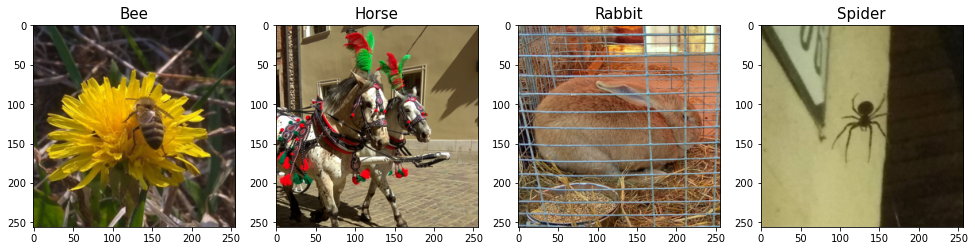

In [13]:
from PIL import Image
import os

directory = os.path.join('..', 'Images', 'Myimages')

images = {
    'Bee': Image.open(os.path.join(directory, 'bee.jpg')),
    'Horse': Image.open(os.path.join(directory, 'horse.jpg')),
    'Rabbit': Image.open(os.path.join(directory, 'rabbit.jpg')),
    'Spider': Image.open(os.path.join(directory, 'spider.jpg'))
}

for img in images:
    images[img] = images[img].resize((256,256))
display_images(images)

Image transformations

In [14]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.CenterCrop(224),         # Crop the image to 224x224 pixels from center
    transforms.ToTensor(),              # Convert image to PyTorch Tensor data type
    transforms.Normalize(               # Normalizing image
        mean=[0.485, 0.456, 0.406],     # Mean and std same as used on training data
        std=[0.229, 0.224, 0.225]
    )
])

Class names

In [15]:
with open('imagenet_classes.txt') as f:
    classes = [line.split(", ")[1].strip() for line in f.readlines()]

Testing NNs and creating .csv file with result

In [16]:
from PIL import ImageOps as imo
from PIL import ImageFilter as imf

def apply_filters(image):
    return {
        'Original': image,
        'Flip': imo.flip(image),
        #'Grayscale': skimage.color.gray2rgb(imo.grayscale(image)),
        'Invert': imo.invert(image),
        'GaussianBlur': image.filter(imf.GaussianBlur(4)),
        'MinFilter': image.filter(imf.MinFilter(5))
    }

Recognition and visualizing results

'DONE'

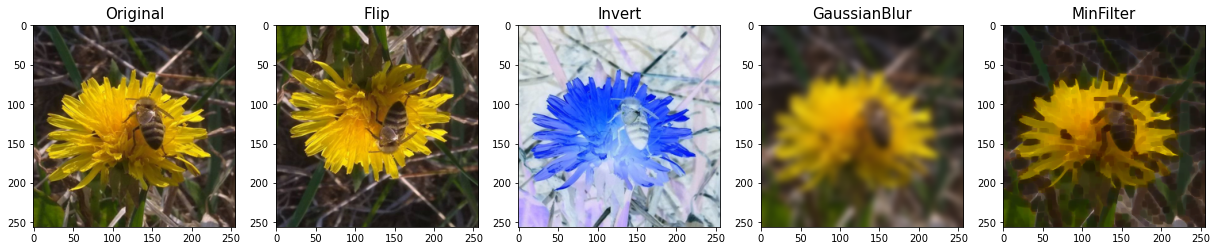

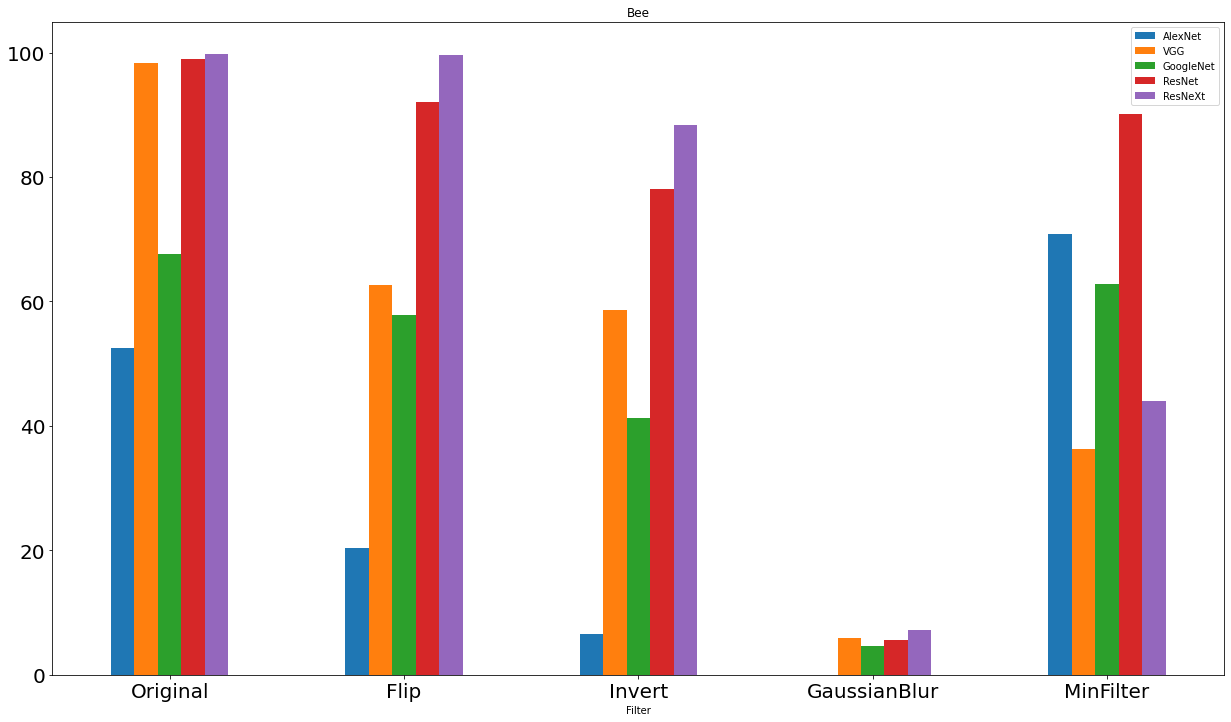

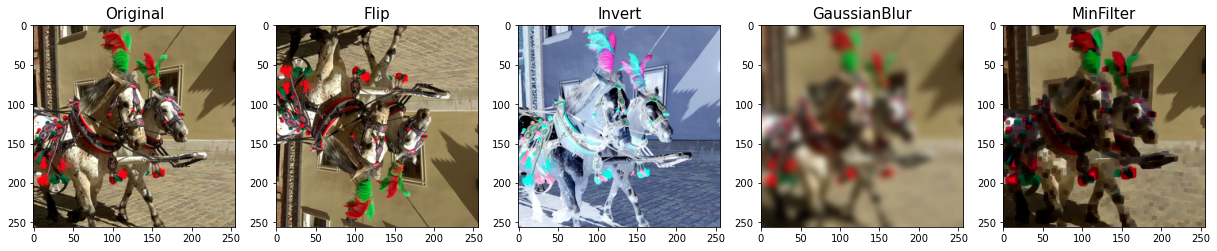

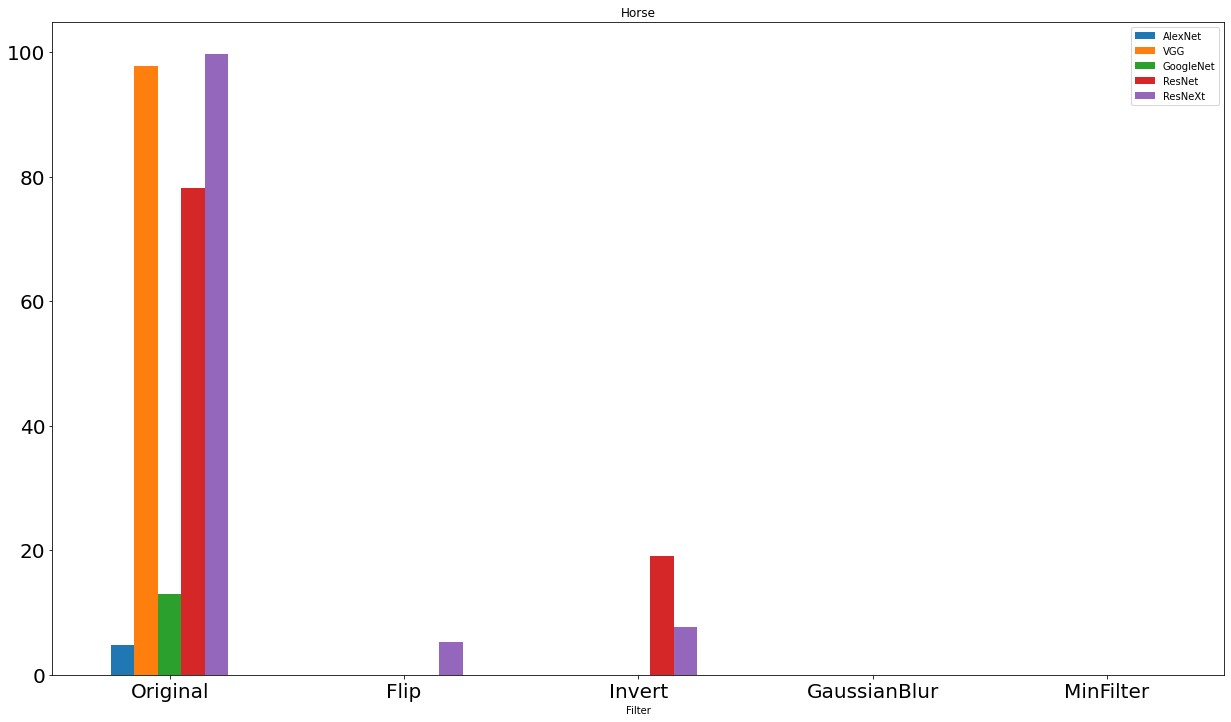

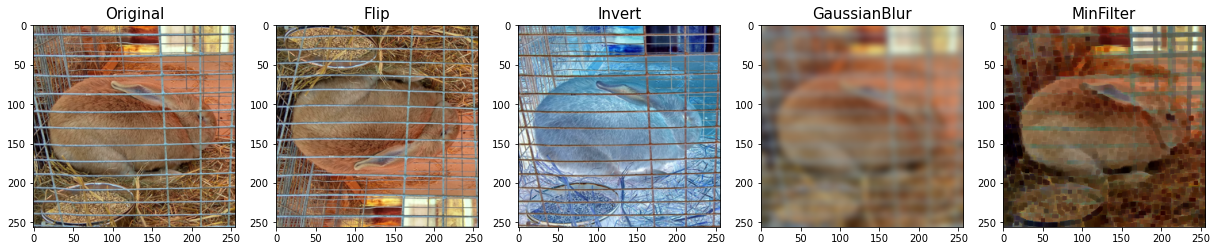

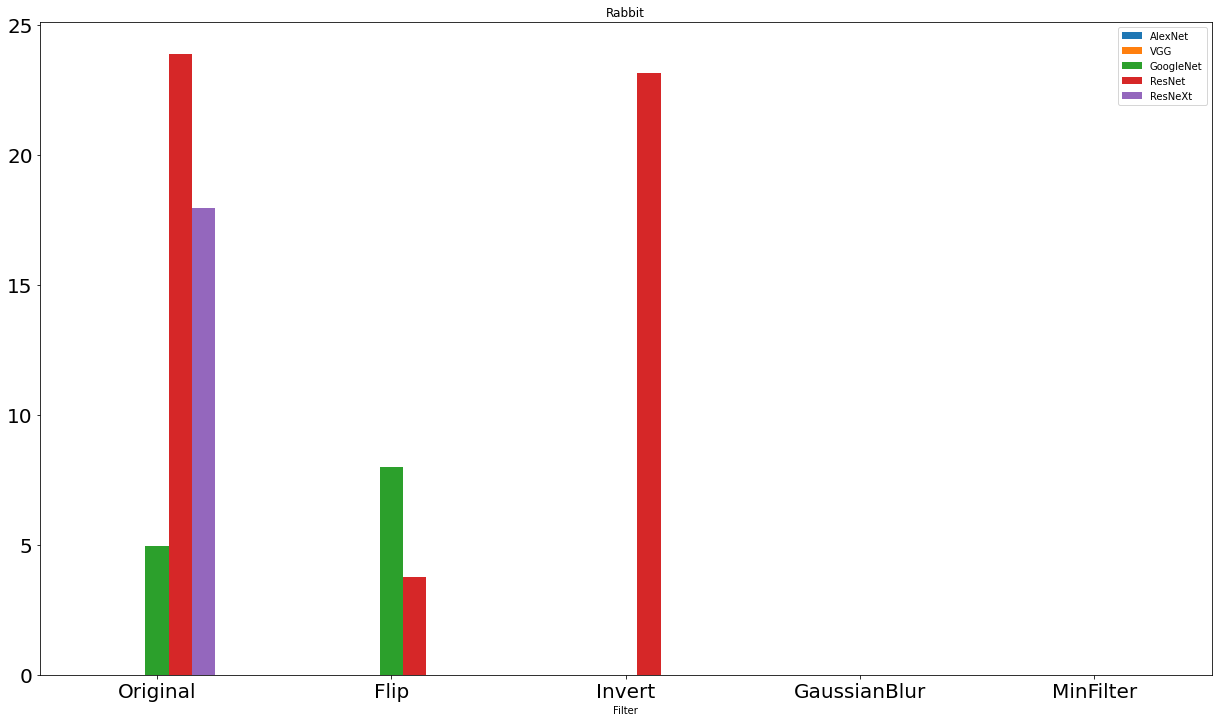

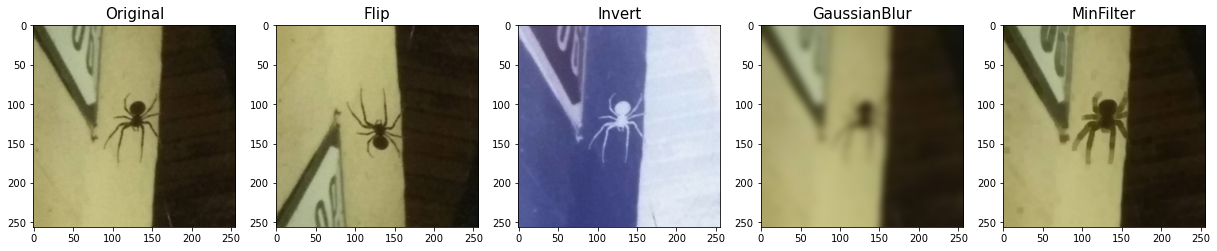

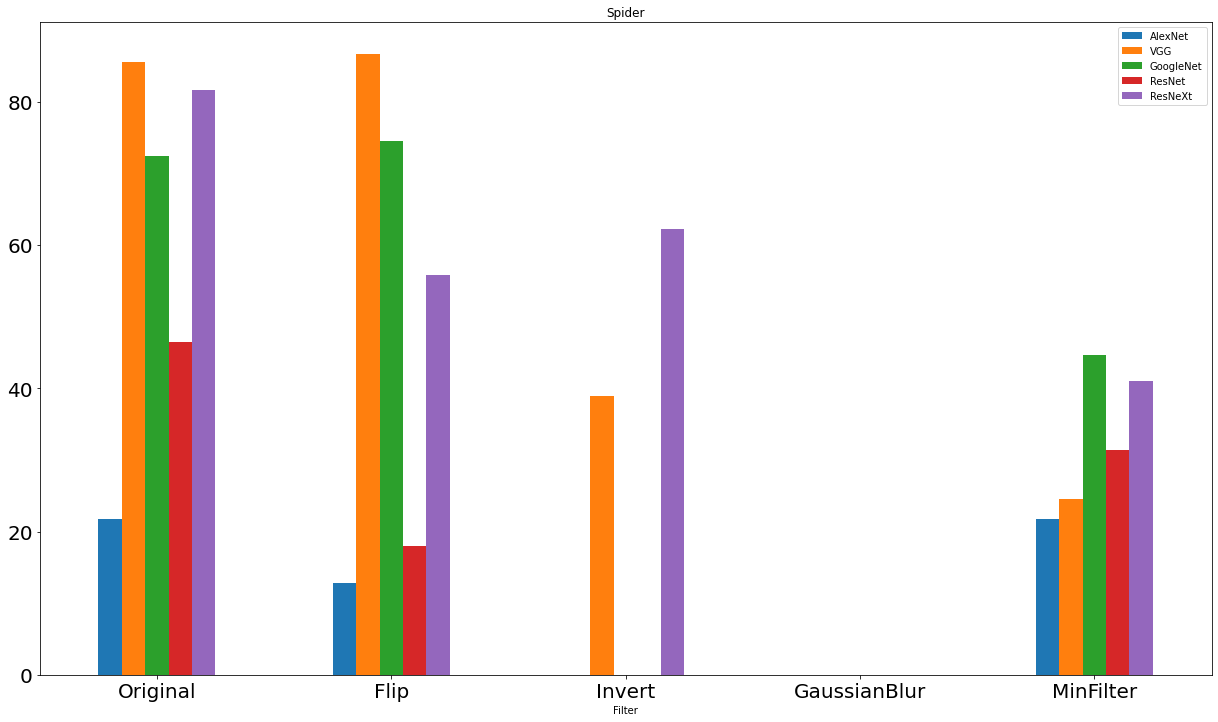

In [17]:
import csv
import pandas as pd
import skimage

for img in images:
    # Opening or creating csv file to store results
    filename = "{}.csv".format(img)
    result = open(filename, 'w')
    filewriter = csv.writer(result, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['Filter', 'AlexNet', 'VGG', 'GoogleNet', 'ResNet', 'ResNeXt'])

    # Getting filterred images
    imageset = apply_filters(images[img])

    # Displaying images
    display_images(imageset)

    # Recognition and writing to file
    for i in imageset:
        row = []
        row.append(i)
        img_t = transform(imageset[i])
        batch_t = torch.unsqueeze(img_t, 0)
        for model in modelDict:
            modelDict[model].eval()
            out = modelDict[model](batch_t)
            _, indices = torch.sort(out, descending=True)
            percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
            found = 0
            for idx in indices[0][:5]:
                if classes[idx].lower().find(img.lower()) >= 0:
                    found = percentage[idx].item()
                    break
            row.append(found)
        try:
            filewriter.writerow(row)
        except:
            print(error)
    result.close()

    # Displaying result
    df = pd.read_csv(filename)
    df.plot(x="Filter", y=['AlexNet', 'VGG', 'GoogleNet', 'ResNet', 'ResNeXt'], kind="bar", fontsize=20, figsize=(21, 12), rot=0, title=(img))
'DONE'